### Ensemble Models (Random Forest)
In our previous approaches for linear regression and logistic regression we used single model and improved the accuracy of the model using that particular model. However, in case of ensemble models we take multiple models and attempt to arrive at an answer (can be a regression outcome or a logistic classification outcome). 

Subsequently, these models are then combined to provide one final outcome. This is very similar to you taking votes from your friends for some decision you might be taking. **MORE HEADS MORE IDEAS & BETTER RESULTS** is the fundamental thought behind these models.

In case of ensemble models we generally take a single training data set and it is divided into sub-models this approach can be done via one (or mix) of the following:
- Divide the data set into subsets for each of the sub-models (Horizontal Division)
- Divide the features in the training data sets and train on the limited sets of features (Vertical Division)
<br>We generally divide the data both horizontally and vertically to train the ensemble models. 

Ensemble models can be understood via a picture below:

<img src="Images/Ensemble Model.jpeg" width="800">

---
**Bagging**, you would've heard this term a lot of times. This is basically nothing but combination of Bootstrapping and Aggregating. Bootstrapping means division of data basis features or data-points and aggregating means aggregating results from multiple models. 

There are a few more technical terms we would want to understand before we actually start implementing one of the most common Ensemble methods, **RANDOM FOREST**. 

- **BOOT STRAPPING**: Bootstrapping means choosing samples from the data with replacement. Each sample that is chosen is called a BAG and the observations which do not form the part of the BAG are called OUT OF BAG samples.
- **HYPER PARAMETERS**: Hyper parameters associated with Random Forest are:
    - Number of Decision Trees
    - Number of records/ features to be sampled
    - Depth and Search Criteria (this is same as classification trees - Gini/ Entropy)
- **FEATURE SELECTION**: Unlike bootstrapping (where features are selected with replacement) feature selection in Random Forest is done without replacement. Which means if one of the sub-models has received Feature say checking account then the next sub-models will not get checking account as a feature.
    
Random forest essentially tries to create multiple decision trees and because the features are selected without replacement the trees are not correlated with each other (this reduces possibility of overfitting). 

##### Implementation of Random Forest
We will use the German Credit Score data for building our Random Forest model you can see the description of the model HERE (insert link for the logistic regression model). 

In [1]:
import pandas as pd
import numpy as np
base_data = pd.read_csv("Datasets/german.data.csv",header = None)
#print(base_data_2.head())
#base_data_2 = pd.read_csv("~/Downloads/german.data.csv",header = None)
base_data.columns = ['checkin_acc','duration','credit_history','purpose','amount',
                      'savings_acc','present_emp_since','inst_rate',
                      'personal_status','other_debters','residing_since','property','age','inst_plans','housing',
                      'num_credits','job','dependent_count','telephone','foreign_worker','status']
base_data['status'] = np.where(base_data['status']==1,0,1)
base_data.head()

selected_columns = ['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status']
base_data = base_data[selected_columns]

base_data.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [2]:
X_features = list(base_data.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [3]:
#Conversion of data into dummy variables.
Y_variable = base_data.status
X_variable = pd.get_dummies(base_data[X_features],drop_first = True)
X_variable.head()
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X_variable,Y_variable, test_size = 0.3, random_state = 1)

Before we start implementing the classifier let us understand the parameters which are required to create the model. *RandomForestClassifier* is available in *sklearn.ensemble* library and it takes following parameters:
1. n_estimators (Integer): Number of trees in the forest (these are essentially our sub-models)
2. criterion (String): Is the criteria to measure the accuracy of the split (Gini or Entropy) to read about them you can read it **here (insert link)**
3. max_features (Integer/ Float/ String): Number of features to be used for each tree (sub-models).
    - Auto/ None: All the features are used for individual trees
    - sqrt: Will take square-root of number of features available in the data
    - float: Will take % of the number of features in the data

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
rforest_clf = RandomForestClassifier(max_depth = 10, n_estimators = 10)
rforest_clf.fit(train_X,train_Y)

RandomForestClassifier(max_depth=10, n_estimators=10)

#### Assessing the Model
Now we will assess the ```random forest``` model, we will be using ```predict_proba``` parameter of random forest classifier to check for the accuracy of the model on test prediction. 

```predict_proba``` gives the output in form of pair, if you note the sum total of each row is 1. Each of the numbers in proba table gives probability of getting 0 and 1 respectively. 

Example in first row we can see probability of getting 0 is 0.853859 and 1 is 0.146141. Now the first record will be categorized as 0 given the probability. 

In [28]:
pd.DataFrame(rforest_clf.predict_proba(test_X)).head()

,0,1
0,0.853859,0.146141
1,0.409356,0.590644
2,0.959353,0.040647
3,0.593565,0.406435
4,0.156909,0.843091


In [33]:
rforest_clf.predict(test_X)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [31]:
from sklearn import metrics
predicted_dataframe = pd.DataFrame({'Actual': test_Y}).reset_index()
predicted_dataframe['Predicted_Classification'] = rforest_clf.predict(test_X)
print(rforest_clf.predict_proba(test_X).shape)
print(predicted_dataframe.shape)
predicted_dataframe.head()
predicted_probability_df = pd.DataFrame(rforest_clf.predict_proba(test_X))
predicted_dataframe['Predicted_Probability'] = predicted_probability_df.iloc[:,1]

(300, 2)
(300, 3)


In [39]:
predicted_dataframe.drop('index',inplace = True,axis=1)
predicted_dataframe.head()


,Actual,Predicted_Classification,Predicted_Probability
0,1,0,0.146141
1,0,1,0.590644
2,0,0,0.040647
3,1,0,0.406435
4,1,1,0.843091


In [40]:
pd.crosstab(predicted_dataframe.Actual,predicted_dataframe.Predicted_Classification,normalize = False,
           margins = True)

Predicted_Classification,0,1,All
Actual,,,
0,189,25,214
1,60,26,86
All,249,51,300


As in case of our logistic regression model [READ HERE], our model predicts the 0 with pretty good accuracy, we can use metrics like ```Youlden's``` Index etc to improve the model further. We can also look at metrics like Precision and Recall using ```classification_report```. 

In [41]:
print(metrics.classification_report(predicted_dataframe.Actual,predicted_dataframe.Predicted_Classification))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       214
           1       0.51      0.30      0.38        86

    accuracy                           0.72       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.69      0.72      0.69       300



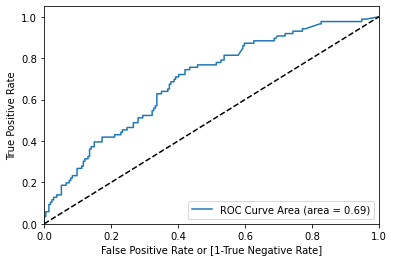

In [32]:
import matplotlib.pyplot as plt
FPR, TPR, thresholds = metrics.roc_curve(predicted_dataframe.Actual,predicted_dataframe['Predicted_Probability'],
                                        drop_intermediate = False)
auc_score = metrics.roc_auc_score(predicted_dataframe.Actual,predicted_dataframe['Predicted_Probability'])
plt.plot(FPR,TPR,label = 'ROC Curve Area (area = %0.2f)'%auc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In this model the cut-off is taken to be 0.5 by default. We can choose the right categorization using the precision and recall curve. 

In [42]:
precision, recalls,thresholds1 = metrics.precision_recall_curve(predicted_dataframe.Actual,
                                                              predicted_dataframe['Predicted_Probability'])
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label = "Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "center left")
    plt.ylim([0,1])

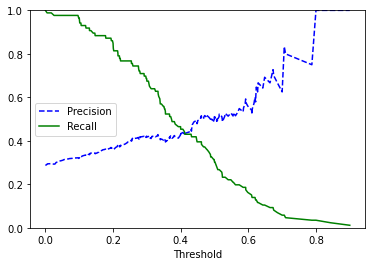

In [43]:
plot_precision_recall_vs_threshold(precision,recalls,thresholds1)
plt.show()

As we can see from above, the appropriate cut-off value can be taken to be 0.4. Let us change the predicted value based on the new cut-off value of 0.4 and try to see the classification report. 

In [57]:
predicted_dataframe.Predicted_Classification = predicted_dataframe['Predicted_Probability'].map(lambda x: 1
                                                                                                if x > 0.2 else 0)

In [58]:
print(metrics.classification_report(predicted_dataframe.Actual, predicted_dataframe.Predicted_Classification))

              precision    recall  f1-score   support

           0       0.86      0.42      0.56       214
           1       0.36      0.83      0.50        86

    accuracy                           0.53       300
   macro avg       0.61      0.62      0.53       300
weighted avg       0.71      0.53      0.54       300



In [59]:
pd.crosstab(predicted_dataframe.Actual,predicted_dataframe.Predicted_Classification,normalize = False,
           margins = True)

Predicted_Classification,0,1,All
Actual,,,
0,89,125,214
1,15,71,86
All,104,196,300


#### Gridsearch for optimal parameters:
We have used the default values for creating our model, we can use the gridsearch to identify the best parameters for getting the accuracy. 

We will be optimizing following parameters:
1. Max Depth of the tree - 5,10,15,20,30
2. n_estimators - 5,10,15,20,30
3. max_features - sqrt or 0.2

Gridsearch can be a little time consuming for the random forest models on our home machines.

In [63]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth':[5,10,15,20,30],
                   'n_estimators':[5,10,15,20,30],
                   'max_features':['sqrt',0.2]}]
random_classifier = RandomForestClassifier()
clf = GridSearchCV(random_classifier,tuned_parameters,
                  cv = 5,
                  scoring = 'roc_auc')

In [64]:
clf.fit(train_X,train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15, 20, 30],
                          'max_features': ['sqrt', 0.2],
                          'n_estimators': [5, 10, 15, 20, 30]}],
             scoring='roc_auc')

In [66]:
print(clf.best_score_)
print(clf.best_params_)

0.7747096372542235
{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 30}


As we can see the best AUC score from the selected parameters is 0.77. Best parameters are:
- max_depth: 30
- max_features: sqrt
- n_estimators: 30

This is hyperparameter tuning.

By using the cut-off of 0.4 we have improved the recall and precision for fraud prediction. However, the gain is not much we might have to use a lower value of cut-off. 

A general rule-of thumb is if the cost of Type-II Error is high (meaning selecting someone who should not be selected) then the cut-off probability should be kept low. 

In this case if a customer who has high probability of fraud and is given a loan might lead to a default. Therefore, we would generally keep the cut-off low so most of the customers who have a chance of default should be categorized correctly. 

Remember, this might mean that you will end up categorizing some customers who have no chance of default being categorized as people who might default. The business users then can take a case to case call on the classification. Some of the approaches business can take are:
- Keep a hard probability say 0.3 anyone below this will be categorized as good credit 
- Keep a soft limit say 0.5, above which is bad credit
- Between soft and hard limit business can scrutinize the customer more

This can be understood via the diagram below. 

<img src="Images/Categorization.jpeg" width="300">

Random forest is a pretty versatile algorithm, which can be used in wide range of tasks like classification or regression. This model works pretty well with high-dimensional data, random forest is able to handle outliers pretty well. 

I hope you enjoy reading this. 